## 1. importing the Dependencies

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove dodgy images 

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
img_ext = ['png', 'jpg', 'jpeg', 'bmp']

In [6]:
image_path = os.path.join('data', 'happy','MV5BZjYwNTc1M2MtM2YxMi00YzYyLTkxY2ItY2I3OWE3NDBmNDVmXkEyXkFqcGdeQXVyMjkwOTAyMDU._V1_.jpg')
image_path

'data\\happy\\MV5BZjYwNTc1M2MtM2YxMi00YzYyLTkxY2ItY2I3OWE3NDBmNDVmXkEyXkFqcGdeQXVyMjkwOTAyMDU._V1_.jpg'

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) 
            if tip not in img_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 431 files belonging to 2 classes.


In [10]:
# convert a tf.data.Dataset object into an iterator
data_iterator = data.as_numpy_iterator()
# This can be useful when you want to work with TensorFlow datasets using NumPy arrays

In [11]:
# To get another batch from the iterator
batch = data_iterator.next()

In [12]:
print(len(batch))
batch[0].shape
# 2 means the image and label 
# shape of batch means (num of images, pixels of height, width, channels)

2


(32, 256, 256, 3)

batch[0] -> that have 32 img 
batch[1] -> that have 32 labels of this images

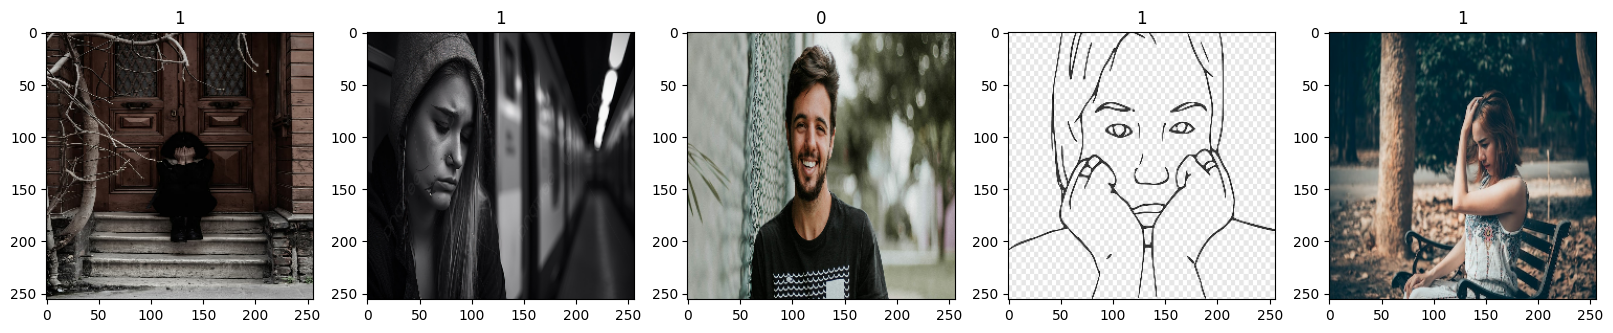

In [13]:
# 0 -> Happy 
# 1 -> Sad
fig, ax = plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].max()

1.0

Split Data

In [18]:
len(data)

14

In [19]:
train_size = int(len(data) *0.7) 
val_size = int(len(data) *0.2)+1
test_size = int(len(data) *0.1)+1

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)
# test = data.skip(train_size + val_size).take(test_size)

## 3. Deep Model

Build Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16,(3,3),1, activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation="relu", input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [26]:
import shutil

logdir = 'logs'

# Remove the directory and its contents if it exists
if os.path.exists(logdir):
    shutil.rmtree(logdir)
    
# Create the directory    
os.makedirs(logdir)

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


9/9 [==============================] - 9s 330ms/step - loss: 0.7252 - accuracy: 0.5278 - val_loss: 0.7038 - val_accuracy: 0.4583
Epoch 2/20
9/9 [==============================] - 4s 342ms/step - loss: 0.6695 - accuracy: 0.6562 - val_loss: 0.6147 - val_accuracy: 0.8750
Epoch 3/20
9/9 [==============================] - 5s 382ms/step - loss: 0.5225 - accuracy: 0.7951 - val_loss: 0.3666 - val_accuracy: 0.8542
Epoch 4/20
9/9 [==============================] - 4s 345ms/step - loss: 0.3594 - accuracy: 0.8750 - val_loss: 0.3779 - val_accuracy: 0.8229
Epoch 5/20
9/9 [==============================] - 5s 375ms/step - loss: 0.3615 - accuracy: 0.8542 - val_loss: 0.2408 - val_accuracy: 0.9167
Epoch 6/20
9/9 [==============================] - 4s 338ms/step - loss: 0.2714 - accuracy: 0.9028 - val_loss: 0.1966 - val_accuracy: 0.9167
Epoch 7/20
9/9 [==============================] - 4s 350ms/step - loss: 0.1995 - accuracy: 0.9375 - val_loss: 0.1285 - val_accuracy: 0.9792
Epoch 8/20
9/9 [===============

Plot Performance

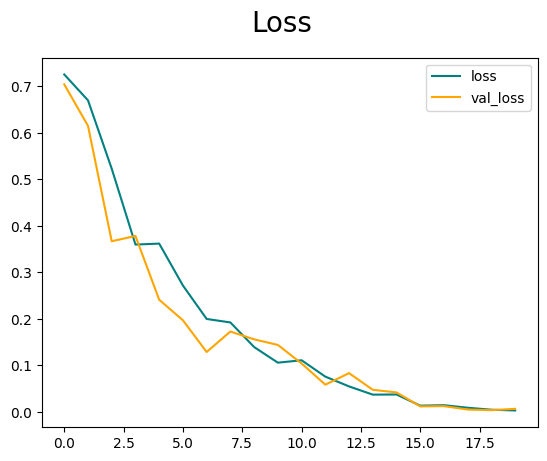

In [29]:
fig = plt.figure()

plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color ='orange', label = 'val_loss')

fig.suptitle('Loss', fontsize =20)
plt.legend(loc = 'upper right')
plt.show()

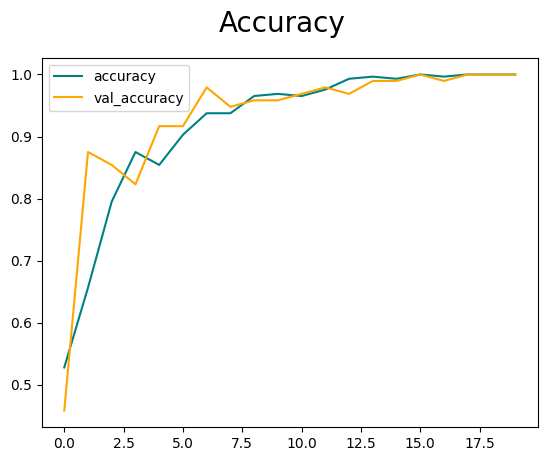

In [30]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange', label = 'val_accuracy')

fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc = 'upper left')
plt.show()

## 4. Evaluate Performance

Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,  yhat)
    acc.update_state(y,  yhat)

1/1 [==============================] - 0s 407ms/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuarcy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuarcy:1.0


Test

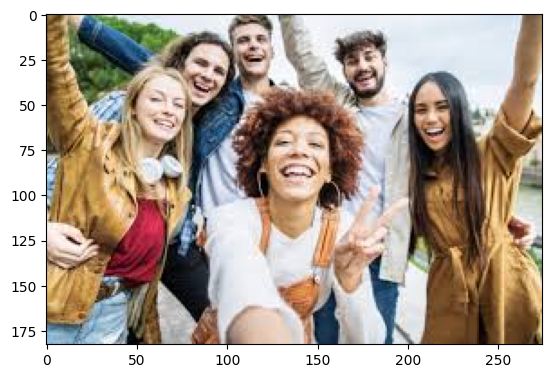

In [123]:
img = cv2.imread('happy test.jpg')
# change image to be RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.show()

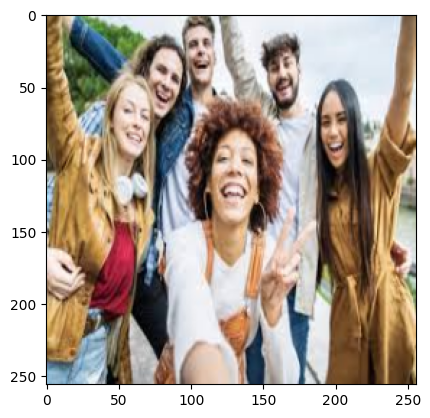

In [124]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [125]:
resize.shape

TensorShape([256, 256, 3])

In [144]:
# very crucial step
np.expand_dims(resize, 0).shape
# This represents a batch containing one image with dimensions 256x256 and 3 color channels.
# make that cause we dealing with batch predictions.

(1, 256, 256, 3)

In [127]:
scale = resize/255

In [128]:
yhat = model.predict(np.expand_dims(scale, 0))

1/1 [==============================] - 0s 24ms/step


In [129]:
yhat

array([[1.6846387e-06]], dtype=float32)

In [130]:
if yhat > 0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is Happy')

predicted class is Happy


## 5. Save the Model

In [131]:
from tensorflow.keras.models import load_model

In [132]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [133]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [135]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 84ms/step


In [136]:
if yhatnew > 0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is Happy')

predicted class is Happy


## 6. System 

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf

def load_and_predict(image_path, model_path):
    # Load the model
    try:
        model = tf.keras.models.load_model(model_path)
    
    except Exception as e:
        print("Error loading model:", e)
        return None
    # check if image file exist
    if not os.path.exists(image_path):
        print("Error: Image file not found.")
        return None
    
    # Read and preprocess the image
    try:
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize = tf.image.resize(img, (256, 256))
        scale = resize / 255
    
        # Make predictions
        yhat = model.predict(np.expand_dims(scale, 0))
        
        # Determine the predicted class
        predicted_class = "Sad" if yhat > 0.5 else "Happy"
        
        return predicted_class
    
    except Exception as e:
        
        print("Error processing image:", e)
        
        return None

In [3]:
image_path = 'sad test.jpg'
model_path = os.path.join('models', 'happysadmodel.h5')
prediction = load_and_predict(image_path, model_path)
print(f"Predicted class is {prediction}")

1/1 [==============================] - 3s 3s/step
Predicted class is Sad
